# Time Series analysis

In [76]:
import quandl
import pandas as pd

quandl.ApiConfig.api_key = '9unsw8wXbjkb76dV-s_C'

# tesla dataset
tesla = quandl.get('WIKI/TSLA')

# gm dataset
gm = quandl.get('WIKI/GM')

In [52]:
tesla.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0


In [7]:
gm.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-11-18,35.00,35.99,33.89,34.19,457044300.0,0.0,1.0,29.988317,30.836558,29.037259,29.294302,457044300.0
2010-11-19,34.15,34.50,33.11,34.26,107842000.0,0.0,1.0,29.260029,29.559912,28.368948,29.354278,107842000.0
2010-11-22,34.20,34.48,33.81,34.08,36650600.0,0.0,1.0,29.302870,29.542776,28.968714,29.200053,36650600.0
2010-11-23,33.95,33.99,33.19,33.25,31170200.0,0.0,1.0,29.088668,29.122940,28.437493,28.488901,31170200.0
2010-11-24,33.73,33.80,33.22,33.48,26138000.0,0.0,1.0,28.900170,28.960146,28.463197,28.685967,26138000.0


<b>some eda to get a feel for data</b>

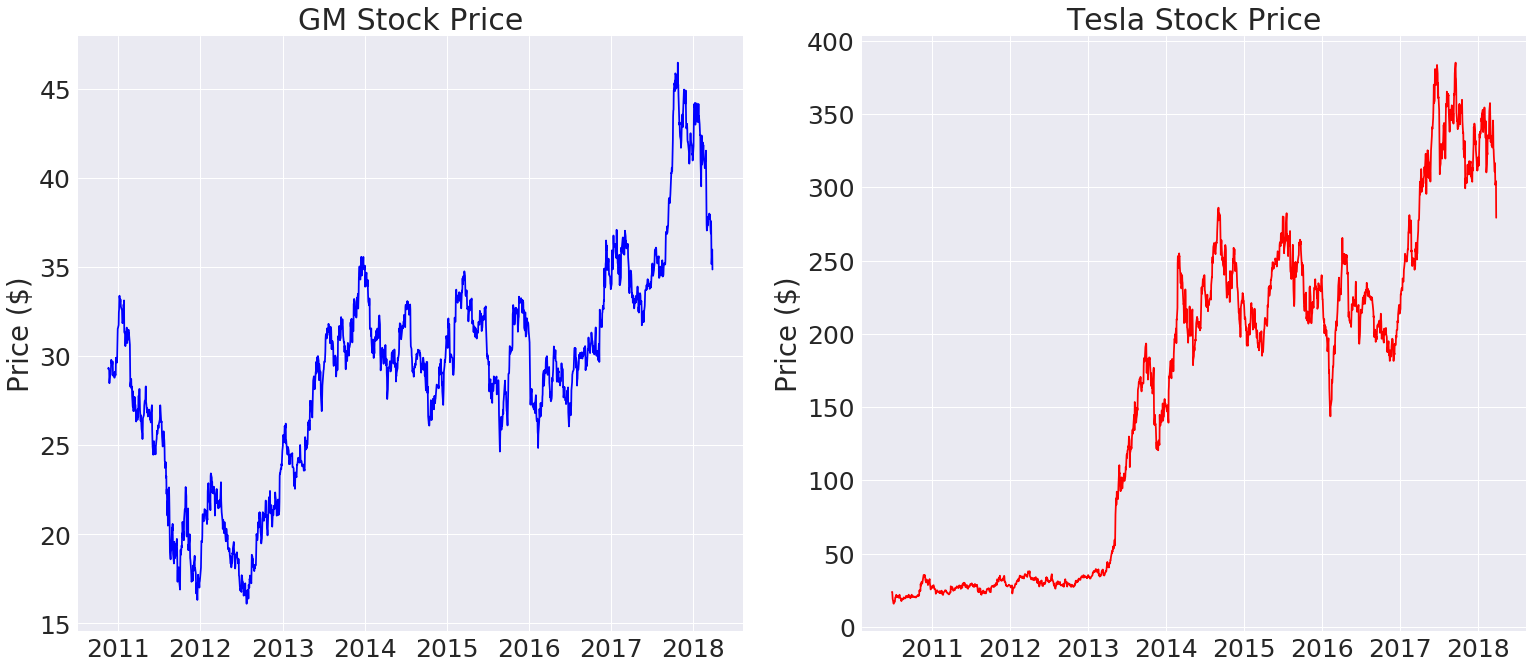

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# The adjusted close accounts for stock splits, so that is what we should graph
sns.set(font_scale=2.5)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22, 10))
ax[0].plot(gm.index, gm['Adj. Close'], 'b')
ax[0].set_title('GM Stock Price')
ax[0].set(ylabel = 'Price ($)')

ax[1].plot(tesla.index, tesla['Adj. Close'], 'r')
ax[1].set_title('Tesla Stock Price')
plt.ylabel('Price ($)');

plt.tight_layout()
plt.show()


Market cap also depends on number of shares: market cap = no.of shares*sharePrice. We don't have number of shares in our dataset but by doing a google search yields the average yearly shares for tesla and gm.

In [45]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1949 entries, 2010-06-29 to 2018-03-27
Data columns (total 12 columns):
Open           1949 non-null float64
High           1949 non-null float64
Low            1949 non-null float64
Close          1949 non-null float64
Volume         1949 non-null float64
Ex-Dividend    1949 non-null float64
Split Ratio    1949 non-null float64
Adj. Open      1949 non-null float64
Adj. High      1949 non-null float64
Adj. Low       1949 non-null float64
Adj. Close     1949 non-null float64
Adj. Volume    1949 non-null float64
dtypes: float64(12)
memory usage: 197.9 KB


In [79]:
# Yearly average number of shares outstanding for Tesla and GM
tesla_shares = {2018: 168e6, 2017: 162e6, 2016: 144e6, 2015: 128e6, 2014: 125e6, 2013: 119e6, 2012: 107e6, 2011: 100e6, 2010: 51e6}

gm_shares = {2018: 1.42e9, 2017: 1.50e9, 2016: 1.54e9, 2015: 1.59e9, 2014: 1.61e9, 2013: 1.39e9, 2012: 1.57e9, 2011: 1.54e9, 2010:1.50e9}

tesla['Year'] = tesla.index.year
gm['Year'] = gm.index.year

tesla.reset_index(level=0, inplace=True)
gm.reset_index(level=0, inplace=True)
tesla['cap'] = 0
gm['cap'] = 0

# Calculate market cap for all years
for i, year in enumerate(tesla['Year']):
    # Retrieve the shares for the year
    shares = tesla_shares.get(year)
    
    # Update the cap column to shares times the price
    tesla.iloc[i]['cap'] = shares * tesla.iloc[i]['Adj. Close']
    
# calculate market cap for gm
for i, year in enumerate(gm['Year']):
    # Retrieve the shares for the year
    shares = gm_shares.get(year)
    
    # Update the cap column to shares times the price
    gm.iloc[i]['cap'] = shares * gm.iloc[i]['Adj. Close']

/home/aadi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/aadi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


We'll do the same for gm dataset.

In [81]:
tesla.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Year,cap
0,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0,2010,0
1,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0,2010,0
2,2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0,2010,0
3,2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0,2010,0
4,2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0,2010,0


In [87]:
tesla['Close'].rolling(5).mean().iloc[-1]

302.10600000000073

In [90]:
tesla['Close'].tail().sum()/5

302.10600000000005